In [10]:
import pandas as pd
import numpy as np

import tensorflow as tf

from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [13]:
df = pd.read_csv('D:\ĐATN\Data\File_da_xu_ly\\full_data\Data_full_10_nam.csv',header=0)

In [14]:
df['DATE (MM/DD/YYYY)'] = pd.to_datetime(df['DATE (MM/DD/YYYY)'], format='%Y-%m-%d %H:%M:%S')
df.set_index('DATE (MM/DD/YYYY)', inplace=True)
df

,Zenith Angle [degrees],Azimuth Angle [degrees],Airmass,Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower Wind Chill Temp [deg C],Tower RH [%],Total Cloud Cover [%],Opaque Cloud Cover [%],...,Global CM6b (cor) [W/m^2],Global CM3 (cor) [W/m^2],Global PSP (vent/cor) [W/m^2],Global TSP-700 Vent [W/m^2],Global SP Lite2 [W/m^2],Global LI-200 [W/m^2],Global SP-110 [W/m^2],Global Extraterrestrial (calc) [W/m^2],Direct Extraterrestrial (calc) [W/m^2],GHI Mean
DATE (MM/DD/YYYY),,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,163.21145,356.58560,0.0,-10.380,-10.857,-11.957,-10.380,86.80,0,0,...,0.0,0.000000,1.28050,0.960290,0.001981,0.000000,0.000000,0.0,0.0,0.0
2013-01-01 00:01:00,163.22151,357.38163,0.0,-10.330,-10.795,-11.895,-10.330,86.90,0,0,...,0.0,0.000000,1.33520,1.105190,0.007925,0.000000,0.000000,0.0,0.0,0.0
2013-01-01 00:02:00,163.22889,358.17842,0.0,-10.310,-10.788,-11.888,-10.310,86.80,0,0,...,0.0,0.000000,1.34580,0.751476,0.001981,0.000000,0.000000,0.0,0.0,0.0
2013-01-01 00:03:00,163.23360,358.97573,0.0,-10.190,-10.631,-11.731,-10.190,87.10,0,0,...,0.0,0.000000,1.32390,0.649195,0.000000,0.016435,0.000000,0.0,0.0,0.0
2013-01-01 00:04:00,163.23564,359.77334,0.0,-10.230,-10.685,-11.885,-10.230,86.20,0,0,...,0.0,0.000000,1.35590,0.623622,0.005944,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:55:00,163.18708,352.88171,0.0,-1.138,-3.305,-6.805,-1.138,61.80,0,0,...,0.0,0.000000,3.88137,0.962447,0.000000,0.000000,0.000000,0.0,0.0,0.0
2023-12-31 23:56:00,163.20952,353.67353,0.0,-1.083,-3.374,-6.874,-1.083,61.15,0,0,...,0.0,0.000000,3.64640,1.102110,0.000000,0.000000,0.000000,0.0,0.0,0.0
2023-12-31 23:57:00,163.22932,354.46717,0.0,-1.068,-3.288,-6.888,-1.068,61.00,0,0,...,0.0,0.703065,3.43392,1.272200,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [15]:
df.drop(columns=['Global CMP22 (vent/cor) [W/m^2]','Global CM6b (cor) [W/m^2]','Global CM3 (cor) [W/m^2]','Global PSP (vent/cor) [W/m^2]','Global LI-200 [W/m^2]','Global TSP-700 Vent [W/m^2]','Global SP Lite2 [W/m^2]','Global SP-110 [W/m^2]'], inplace=True)
df

,Zenith Angle [degrees],Azimuth Angle [degrees],Airmass,Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower Wind Chill Temp [deg C],Tower RH [%],Total Cloud Cover [%],Opaque Cloud Cover [%],Avg Wind Speed @ 19ft [m/s],Peak Wind Speed @ 19ft [m/s],Avg Wind Direction @ 19ft [deg from N],Vertical Wind Shear [1/s],Station Pressure [mBar],Global Extraterrestrial (calc) [W/m^2],Direct Extraterrestrial (calc) [W/m^2],GHI Mean
DATE (MM/DD/YYYY),,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,163.21145,356.58560,0.0,-10.380,-10.857,-11.957,-10.380,86.80,0,0,0.000,0.00,0.00,0.000,814.112,0.0,0.0,0.0
2013-01-01 00:01:00,163.22151,357.38163,0.0,-10.330,-10.795,-11.895,-10.330,86.90,0,0,0.000,0.00,0.00,0.000,814.112,0.0,0.0,0.0
2013-01-01 00:02:00,163.22889,358.17842,0.0,-10.310,-10.788,-11.888,-10.310,86.80,0,0,0.000,0.00,0.00,0.000,814.112,0.0,0.0,0.0
2013-01-01 00:03:00,163.23360,358.97573,0.0,-10.190,-10.631,-11.731,-10.190,87.10,0,0,0.512,0.95,351.90,0.000,814.112,0.0,0.0,0.0
2013-01-01 00:04:00,163.23564,359.77334,0.0,-10.230,-10.685,-11.885,-10.230,86.20,0,0,1.000,1.20,343.70,0.000,814.112,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:55:00,163.18708,352.88171,0.0,-1.138,-3.305,-6.805,-1.138,61.80,0,0,0.035,0.70,14.93,0.039,818.020,0.0,0.0,0.0
2023-12-31 23:56:00,163.20952,353.67353,0.0,-1.083,-3.374,-6.874,-1.083,61.15,0,0,0.035,0.70,14.93,0.000,818.015,0.0,0.0,0.0
2023-12-31 23:57:00,163.22932,354.46717,0.0,-1.068,-3.288,-6.888,-1.068,61.00,0,0,0.035,0.70,14.93,0.000,818.008,0.0,0.0,0.0


In [16]:
print(df.isna().sum())

Zenith Angle [degrees]                    0
Azimuth Angle [degrees]                   0
Airmass                                   0
Tower Dry Bulb Temp [deg C]               0
Tower Wet Bulb Temp [deg C]               0
Tower Dew Point Temp [deg C]              0
Tower Wind Chill Temp [deg C]             0
Tower RH [%]                              0
Total Cloud Cover [%]                     0
Opaque Cloud Cover [%]                    0
Avg Wind Speed @ 19ft [m/s]               0
Peak Wind Speed @ 19ft [m/s]              0
Avg Wind Direction @ 19ft [deg from N]    0
Vertical Wind Shear [1/s]                 0
Station Pressure [mBar]                   0
Global Extraterrestrial (calc) [W/m^2]    0
Direct Extraterrestrial (calc) [W/m^2]    0
GHI Mean                                  0
dtype: int64


In [17]:
# Resample to 5 min
df = df.resample('5T').mean('df')
df

C:\Users\nvthi\AppData\Local\Temp\ipykernel_18992\3035669491.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df = df.resample('5T').mean('df')


,Zenith Angle [degrees],Azimuth Angle [degrees],Airmass,Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower Wind Chill Temp [deg C],Tower RH [%],Total Cloud Cover [%],Opaque Cloud Cover [%],Avg Wind Speed @ 19ft [m/s],Peak Wind Speed @ 19ft [m/s],Avg Wind Direction @ 19ft [deg from N],Vertical Wind Shear [1/s],Station Pressure [mBar],Global Extraterrestrial (calc) [W/m^2],Direct Extraterrestrial (calc) [W/m^2],GHI Mean
DATE (MM/DD/YYYY),,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,163.226218,358.178944,0.0,-10.2880,-10.7512,-11.8712,-10.2880,86.760,0.0,0.0,0.3024,0.43,139.1200,0.0000,814.1120,0.0,0.0,0.0
2013-01-01 00:05:00,163.223044,2.164960,0.0,-10.4420,-10.9420,-12.1820,-10.4420,85.520,0.0,0.0,1.2404,1.40,334.0000,0.0000,814.1120,0.0,0.0,0.0
2013-01-01 00:10:00,163.153204,6.135276,0.0,-10.5220,-11.0180,-12.2380,-10.5220,85.700,0.0,0.0,1.4528,1.70,341.7400,0.0000,814.1120,0.0,0.0,0.0
2013-01-01 00:15:00,163.017532,10.061912,0.0,-10.7780,-11.2842,-12.6042,-10.7780,84.820,0.0,0.0,1.5552,1.75,352.0800,0.0000,814.1128,0.0,0.0,0.0
2013-01-01 00:20:00,162.817602,13.918920,0.0,-10.9000,-11.3922,-12.6522,-10.9000,85.380,0.0,0.0,1.4252,1.65,213.7160,0.0000,814.1120,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:35:00,162.346456,339.169350,0.0,-1.0742,-3.2992,-6.7392,-1.0742,61.828,0.0,0.0,0.8074,1.15,8.6606,0.0000,818.2250,0.0,0.0,0.0
2023-12-31 23:40:00,162.658890,342.850438,0.0,-1.3160,-3.5162,-6.9562,-1.3160,61.906,0.0,0.0,0.9876,1.30,148.3706,0.0000,818.1980,0.0,0.0,0.0
2023-12-31 23:45:00,162.911452,346.641280,0.0,-1.6152,-3.6824,-7.0424,-1.6152,62.994,0.0,0.0,1.1004,1.40,7.5992,0.0000,818.1618,0.0,0.0,0.0


# Feature Selection


In [18]:
#importing libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
%matplotlib inline

In [19]:

def bad_correlation_with_output(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method='spearman')  # Calculate Spearman correlation
    num_columns = len(corr_matrix.columns) 
    for i in range(num_columns):
        if i != 0:
            if abs(corr_matrix.iloc[i,17 ]) < threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
Spearman = df.corr(method='spearman')

Text(0.5, 1.0, 'Spearman Correlation')

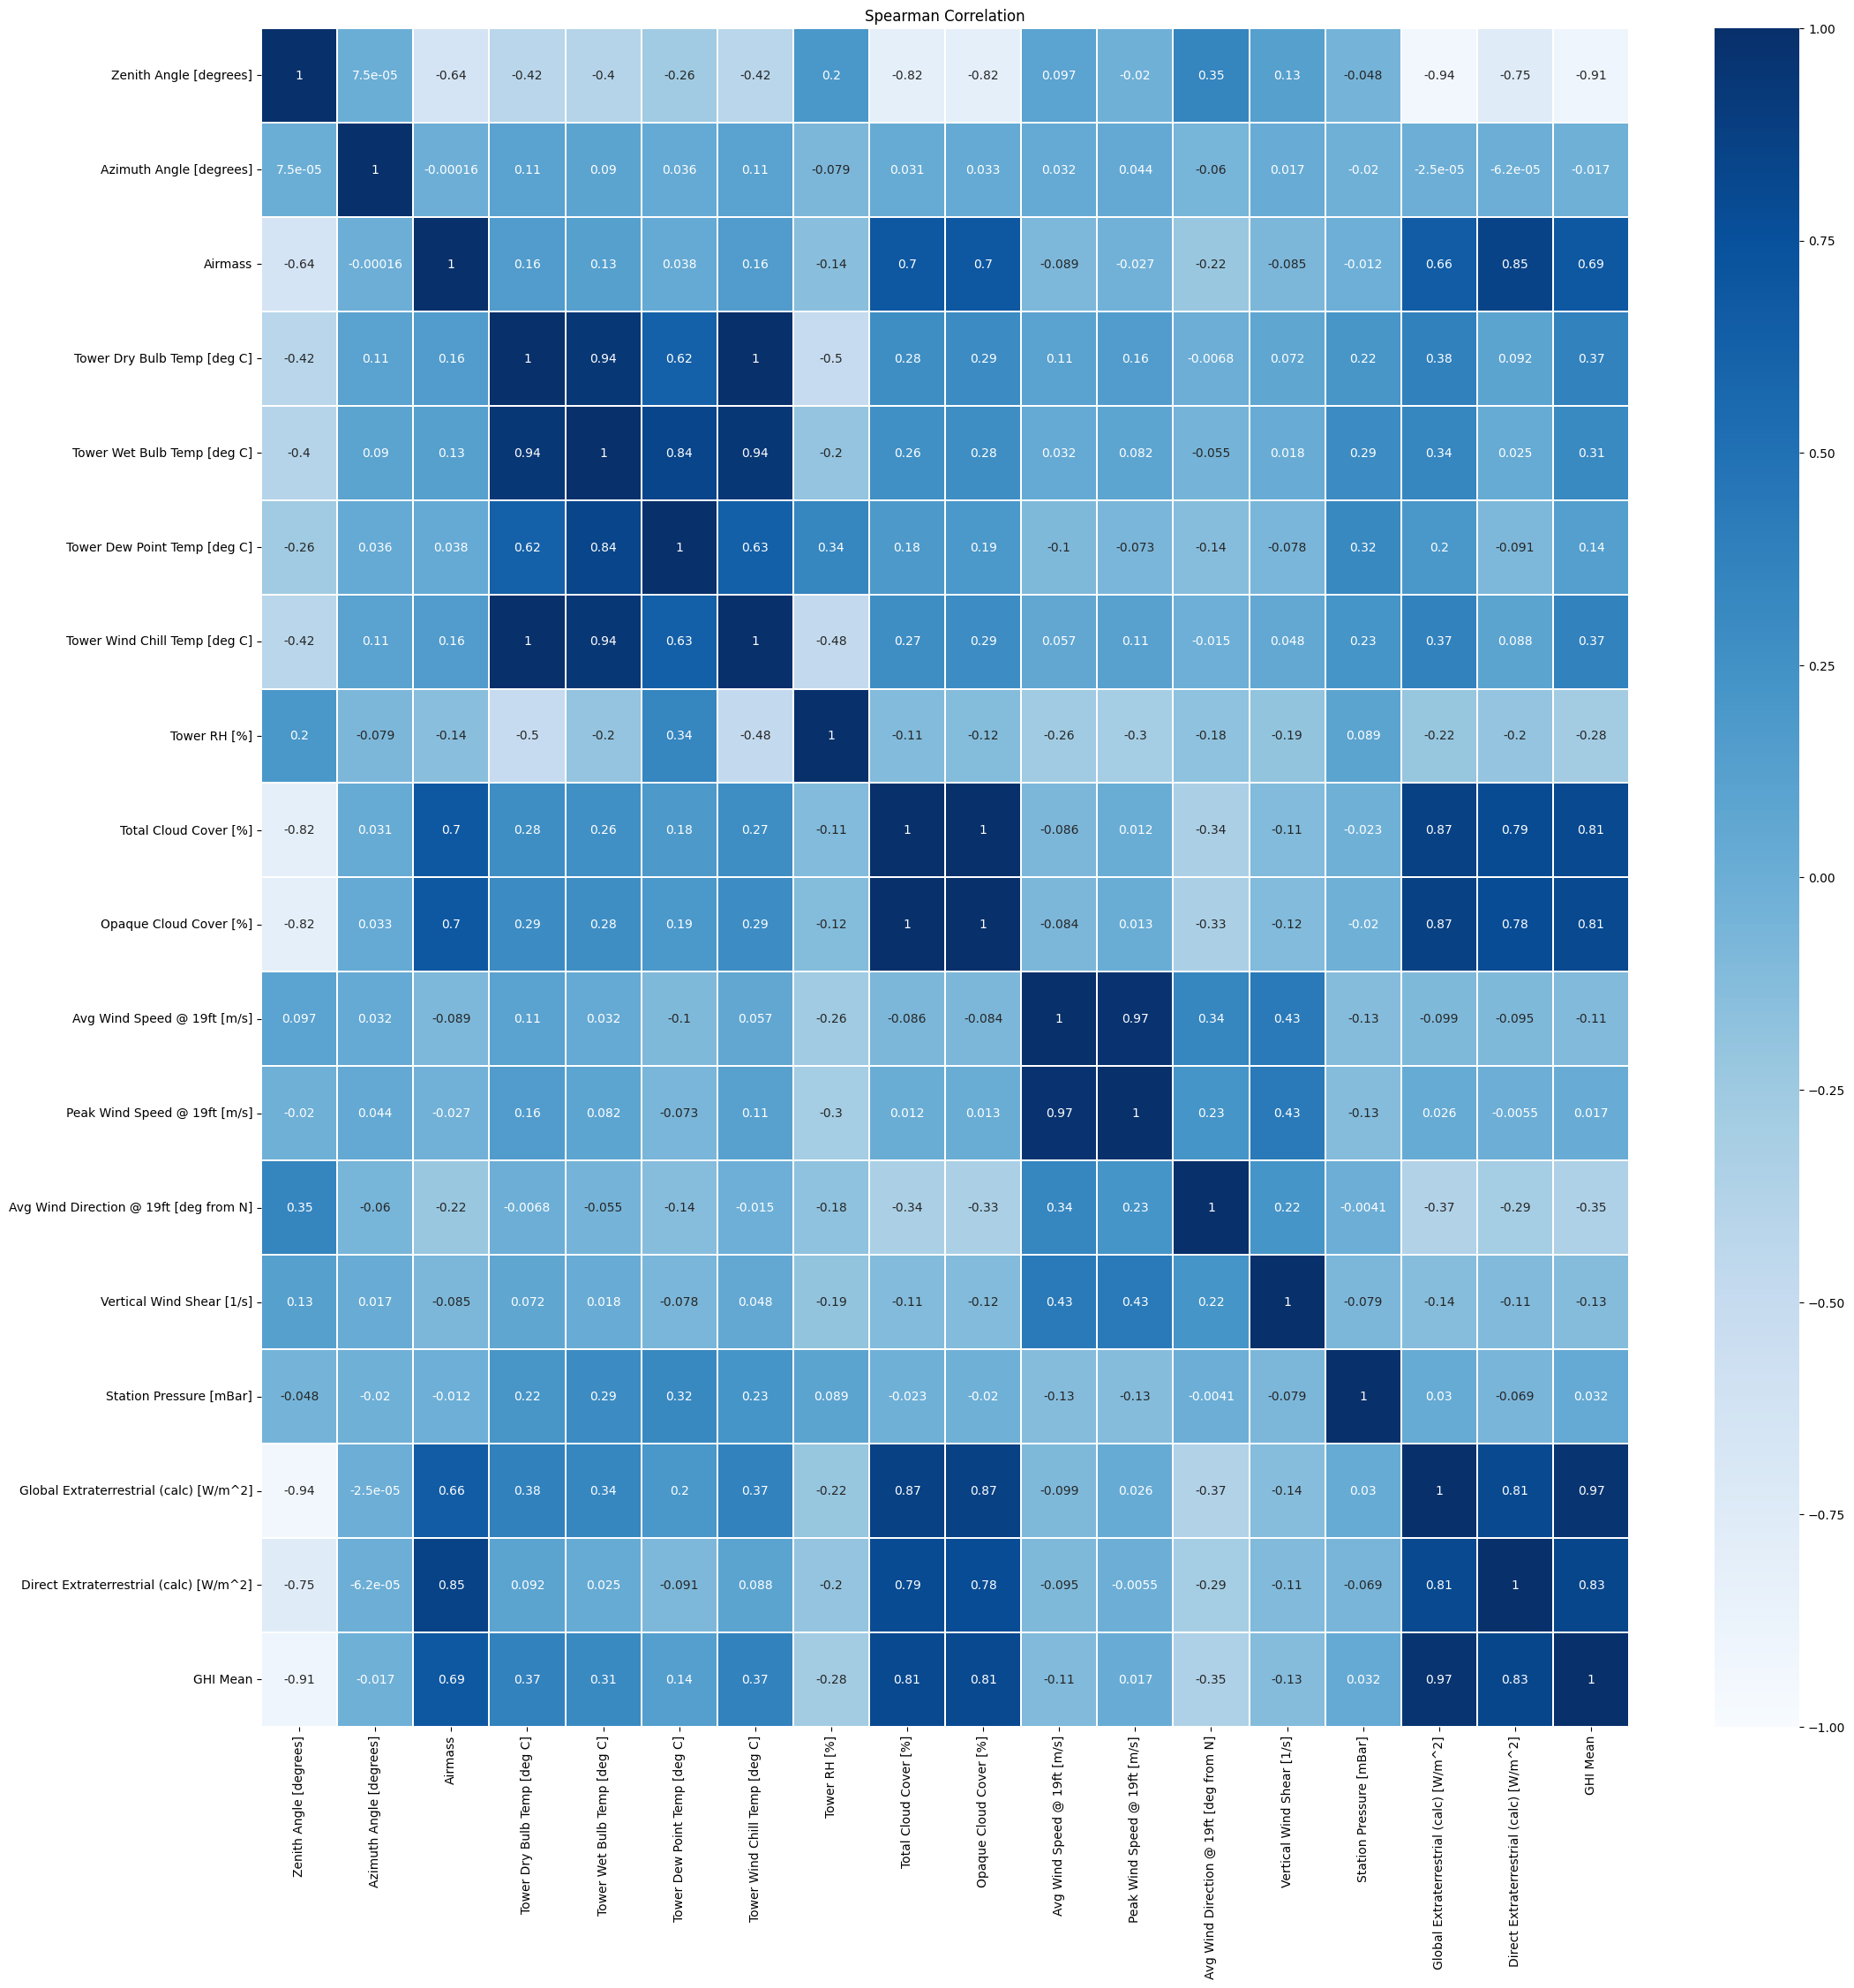

In [21]:
fig = plt.subplots(figsize=(25,25))
sns.heatmap(Spearman, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

In [22]:
bad_features = bad_correlation_with_output(df, 0.2)
print(len(set(bad_features)))
bad_features

6


{'Avg Wind Speed @ 19ft [m/s]',
 'Azimuth Angle [degrees]',
 'Peak Wind Speed @ 19ft [m/s]',
 'Station Pressure [mBar]',
 'Tower Dew Point Temp [deg C]',
 'Vertical Wind Shear [1/s]'}

In [23]:
df= df.drop(bad_features,axis=1)
df.drop(columns=['Tower Wet Bulb Temp [deg C]','Total Cloud Cover [%]','Direct Extraterrestrial (calc) [W/m^2]','Tower Wind Chill Temp [deg C]'], inplace=True)

In [24]:
df

,Zenith Angle [degrees],Airmass,Tower Dry Bulb Temp [deg C],Tower RH [%],Opaque Cloud Cover [%],Avg Wind Direction @ 19ft [deg from N],Global Extraterrestrial (calc) [W/m^2],GHI Mean
DATE (MM/DD/YYYY),,,,,,,,
2013-01-01 00:00:00,163.226218,0.0,-10.2880,86.760,0.0,139.1200,0.0,0.0
2013-01-01 00:05:00,163.223044,0.0,-10.4420,85.520,0.0,334.0000,0.0,0.0
2013-01-01 00:10:00,163.153204,0.0,-10.5220,85.700,0.0,341.7400,0.0,0.0
2013-01-01 00:15:00,163.017532,0.0,-10.7780,84.820,0.0,352.0800,0.0,0.0
2013-01-01 00:20:00,162.817602,0.0,-10.9000,85.380,0.0,213.7160,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-12-31 23:35:00,162.346456,0.0,-1.0742,61.828,0.0,8.6606,0.0,0.0
2023-12-31 23:40:00,162.658890,0.0,-1.3160,61.906,0.0,148.3706,0.0,0.0
2023-12-31 23:45:00,162.911452,0.0,-1.6152,62.994,0.0,7.5992,0.0,0.0


In [25]:
print(df.isna().sum())

Zenith Angle [degrees]                    0
Airmass                                   0
Tower Dry Bulb Temp [deg C]               0
Tower RH [%]                              0
Opaque Cloud Cover [%]                    0
Avg Wind Direction @ 19ft [deg from N]    0
Global Extraterrestrial (calc) [W/m^2]    0
GHI Mean                                  0
dtype: int64


# Split data

In [26]:
# Importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [27]:
### create mutlivariate data
def mutlivariate_data(dataset , target , start_idx , end_idx , history_size , target_size,
                      step ,  single_step = False):
  data = []
  labels = []
  start_idx = start_idx + history_size
  if end_idx is None:
    end_idx = len(dataset)- target_size
  for i in range(start_idx , end_idx ):
    idxs = range(i-history_size, i, step) ### using step
    data.append(dataset[idxs])
    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data) , np.array(labels)

In [28]:
def multivariate_test_data(dataset, target, start_idx, end_idx, history_size, target_size,
                      step, single_step=False):
    data = []
    labels = []
    if end_idx is None:
        end_idx = len(dataset) - history_size - target_size + 1
    for i in range(start_idx, end_idx, step):
        data.append(dataset[i : i + history_size])
        if single_step:
            labels.append(target[i + history_size])
        else:
            labels.append(target[i + history_size : i + history_size + target_size])

    return np.array(data), np.array(labels)

In [29]:
features = df.columns
features

Index(['Zenith Angle [degrees]', 'Airmass', 'Tower Dry Bulb Temp [deg C]',
       'Tower RH [%]', 'Opaque Cloud Cover [%]',
       'Avg Wind Direction @ 19ft [deg from N]',
       'Global Extraterrestrial (calc) [W/m^2]', 'GHI Mean'],
      dtype='object')

In [30]:
# Tính số lượng hàng tương ứng với tỷ lệ
train_size = int(len(df) * 0.98)
val_size = int(len(df) * 0.01)
test_size = int(len(df) * 0.01)

# Cắt dataframe thành train, validation và test
df_train = df.iloc[:train_size]
df_val = df.iloc[train_size:train_size+val_size]
df_test = df.iloc[train_size+val_size:]

# In kích thước của từng phần
print("Kích thước train set:", len(df_train))
print("Kích thước validation set:", len(df_val))
print("Kích thước test set:", len(df_test))

Kích thước train set: 1133758
Kích thước validation set: 11568
Kích thước test set: 11570


In [31]:
train_scaler = StandardScaler()
df_train_scaled =  train_scaler.fit_transform(df_train)
df_val_scaled =  train_scaler.fit_transform(df_val)
df_test_scaled =  train_scaler.fit_transform(df_test)

In [34]:
history = 12
STEP = 1
future_target = 12 # 12 future values 1h x 24

data_train = df_train_scaled
data_val = df_val_scaled
data_test = df_test_scaled

# Tạo dữ liệu cho tập train
x_train_multi, y_train_multi = mutlivariate_data(data_train, data_train[:, 7],
                                                  0,None, 
                                                  history, future_target, STEP)

# Tạo dữ liệu cho tập validation
x_val_multi, y_val_multi = mutlivariate_data(data_val, data_val[:, 7],
                                             0, None, 
                                             history, future_target, STEP)

# Tạo dữ liệu cho tập test
x_test_multi, y_test_multi = multivariate_test_data(data_test, data_test[:,7],
                                               0, None, 
                                               history, future_target, 1)

print(x_train_multi.shape)
print(y_train_multi.shape)
print(x_val_multi.shape)
print(y_val_multi.shape)
print(x_test_multi.shape)
print(y_test_multi.shape)

(1133734, 12, 8)
(1133734, 12)
(11544, 12, 8)
(11544, 12)
(11547, 12, 8)
(11547, 12)


In [35]:
# TF DATASET
buffer_size = 10000
batch_size = 16
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(batch_size).repeat()

test_data_multi = tf.data.Dataset.from_tensor_slices((x_test_multi, y_test_multi))
test_data_multi = test_data_multi.batch(batch_size).repeat()
print(x_train_multi.shape)
print(y_train_multi.shape)
print(x_val_multi.shape)
print(y_val_multi.shape)
print(x_test_multi.shape)
print(y_test_multi.shape)

(1133734, 12, 8)
(1133734, 12)
(11544, 12, 8)
(11544, 12)
(11547, 12, 8)
(11547, 12)


# Test_train

In [36]:
num_epochs = 10
step_per_epochs = 8000

In [37]:
initial_lr = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_lr, decay_steps=10000, decay_rate=0.96,staircase=True)

In [40]:
# Define callbacks
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
lstm_early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lstm_model_checkpoint = ModelCheckpoint("D:\\ĐATN\\lstm_model.h5", monitor='val_loss', save_best_only=True)


lstm_multi_step_model = tf.keras.models.Sequential()

lstm_multi_step_model.add(tf.keras.layers.LSTM(64, return_sequences=True,input_shape=(12,8)))
lstm_multi_step_model.add(tf.keras.layers.Dropout(0.2))

lstm_multi_step_model.add(tf.keras.layers.LSTM(32, activation='relu'))
lstm_multi_step_model.add(tf.keras.layers.Dropout(0.2))


lstm_multi_step_model.add(tf.keras.layers.Dense(future_target)) # for 12 outputs

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
lstm_multi_step_model.compile(optimizer=optimizer, loss='mae')

lstm_multi_step_model.summary()
# Save the model
lstm_model_path = "D:\\ĐATN\\lstm_model.h5"
lstm_multi_step_model.save(lstm_model_path)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 64)            18688     
                                                                 
 dropout_4 (Dropout)         (None, 12, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 12)                396       
                                                                 
Total params: 31500 (123.05 KB)
Trainable params: 31500 (123.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
lstm_multi_step_history =lstm_multi_step_model.fit(train_data_multi, epochs= num_epochs,
                                          steps_per_epoch=step_per_epochs,
                                          validation_data=val_data_multi,
                                          validation_steps=50,
                                          callbacks=[lstm_early_stopping, lstm_model_checkpoint])

Epoch 1/10

 763/8000 [=>............................] - ETA: 1:13 - loss: 51.1939

: 